#Packages and Upload data

In [ ]:
#Install packages not already in Colab
!pip install --upgrade plotly
!pip install pysal
!pip install pyyaml==5.4.1
!pip install contextily
!pip install cmdstanpy==0.9.68

#exit()

     |████████████████████████████████| 26.5 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 2.4 MB 5.0 MB/s 
     |████████████████████████████████| 95 kB 3.7 MB/s 
     |████████████████████████████████| 60 kB 8.0 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 164 kB 60.1 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 41 kB 646 kB/s 
     |████████████████████████████████| 209 kB 58.8 MB/s 
     |████████████████████████████████| 5.7 MB 23.5 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 138 kB 82.4 MB/s 
     |████████████████████████████████| 226 kB 52.4 MB/s 
     |████████████████████████████████| 269 kB 49.2 MB/s 
     |████████████████████████████████| 66.6 MB 9

     |████████████████████████████████| 636 kB 4.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.2 which is incompatible.
     |████████████████████████████████| 49 kB 2.4 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 whic

In [ ]:
# mount "mnt" if you need to upload packages from Google Drive, otherwise mount "drive" --> more stable
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('mnt', force_remount=True)
%cd "/content/mnt/drive/My Drive/Project_X Bayesian"

unset HISTFILE; export PS1="root@83c33db9ece9-c899bea5794b4d49b48de4f8beefd757: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@83c33db9ece9-c899bea5794b4d49b48de4f8beefd757: umount -f mnt || umount mnt; pkill -9 -x drive
umount: mnt: no mount point specified.
umount: mnt: no mount point specified.
root@83c33db9ece9-c899bea5794b4d49b48de4f8beefd757: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@83c33db9ece9-c899bea5794b4d49b48de4f8beefd757: ( while `sleep 0.5`; do if [[ -d "mnt" && "$(ls -A mnt)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 643
root@83c33db9ece9-c899bea5794b4d49b48de4f8beefd757: cat /tmp/tmp46nbn2jw/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virtual_folders_omit_spaces:true --ine

In [ ]:
# Colab settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# General libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import io
import math
import time
import os
import json
import shutil
import urllib.request
import json
import pickle

# Graphical tools libraries 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px 
import plotly.io as pio
import statsmodels.api as sm

# Spatial Analysis Library
import esda  
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pylab import figure, scatter, show

# STAN
import cmdstanpy
import pystan
#cmdstanpy.install_cmdstan()  # very slow
from cmdstanpy import cmdstan_path, CmdStanModel
from pystan import StanModel
import arviz as az

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
tgz_file = 'colab-cmdstan-2.23.0.tar.gz'
tgz_url = 'https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz'
if not os.path.exists(tgz_file):
  urllib.request.urlretrieve(tgz_url, tgz_file)
  shutil.unpack_archive(tgz_file)
  
# Specify CmdStan location via environment variable
os.environ['CMDSTAN'] = './cmdstan-2.23.0'
# Check CmdStan path
cmdstan_path()

('colab-cmdstan-2.23.0.tar.gz', <http.client.HTTPMessage at 0x7f7f5f094790>)

'./cmdstan-2.23.0'

In [ ]:
gdf = gpd.read_file('/content/mnt/MyDrive/Project_X Bayesian/lakechadbasin_data_2015.shp')

gdf.to_file("path_to_GeoJSON _file", driver = "GeoJSON")
with open("path_to_GeoJSON _file") as geofile:
  j_file = json.load(geofile)

gdf

,PageName,PageNumber,con_2015,urb_2015,etn_2015,hcap_2015,wsm_2015,con_2014,geometry
0,A11,3,0,0.000000,1,0.000000,7.000000,0,"POLYGON ((11.82491 15.97952, 11.82491 16.41353..."
1,B9,4,0,0.000000,2,0.000000,6.966667,0,"POLYGON ((10.92659 15.54455, 10.92659 15.97952..."
2,B10,5,0,0.000000,1,0.000000,7.600000,0,"POLYGON ((11.37575 15.54455, 11.37575 15.97952..."
3,B11,6,0,0.000000,1,0.000000,7.960000,0,"POLYGON ((11.82491 15.54455, 11.82491 15.97952..."
4,C8,9,0,0.000000,2,0.000000,6.433333,0,"POLYGON ((10.47744 15.10865, 10.47744 15.54455..."
...,...,...,...,...,...,...,...,...,...
500,X24,548,0,0.000000,0,0.000806,0.566667,0,"POLYGON ((17.66396 5.78336, 17.66396 6.23303, ..."
501,X25,549,0,0.000000,0,0.000000,0.305556,1,"POLYGON ((18.11312 5.78336, 18.11312 6.23303, ..."
502,Y21,551,0,0.000191,1,0.000000,0.320000,4,"POLYGON ((16.31649 5.33333, 16.31649 5.78336, ..."
503,Y22,552,0,0.000153,1,0.000000,0.000000,0,"POLYGON ((16.76564 5.33333, 16.76564 5.78336, ..."


In [ ]:
df = gdf[['con_2015', 'PageName'] + [col for col in gdf.columns[3:8]]]
X = gdf[[col for col in gdf.columns[3:8]]]
y = gdf['con_2015']

In [ ]:
feature_id_map = dict()
for feature in j_file['features']:
  feature['id'] = feature["properties"]["PageNumber"]
  feature_id_map[feature["properties"]["PageName"]] = feature["id"]

df['id'] = df['PageName'].apply(lambda x: feature_id_map[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Generate the contiguity matrix W
wq =  lps.weights.Queen.from_dataframe(gdf)
wq.transform = 'r'
W, ids = wq.full() 

# Generate a sparse representation for W, D_sparse and eigenvalues of W
N=505
W_sparse = []
D_sparse = []
for i in range(0, N-1):    #loop over upper triangular part of W to identify neighbor pairs
   for j in range(i+1, N):
      if W[i][j]:
        W_sparse.append([i+1, j+1])
      
     
for i in range(N):
  counter = 0
  for j in range(N):
      if W[i][j]:
        counter += 1
  D_sparse.append(counter)

D_sparse = np.array(D_sparse)
W_sparse = np.array(W_sparse)

eigen = np.linalg.eigvals(W)

# Data exploration

In [ ]:
# Numero di zeri e Percentuale di zeri nei conflitti del 2015

n_nonzeros = np.count_nonzero(y)
n_zeros = len(y) - n_nonzeros
print(n_zeros)
perc_zeros = n_zeros/len(y)
print(perc_zeros)

380
0.7524752475247525


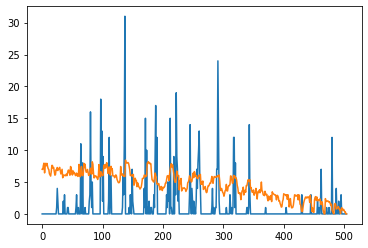

In [ ]:
gdf["con_2015"].plot()  #blu
gdf["wsm_2015"].plot() #arancione

(array([452.,  17.,  14.,   9.,   7.,   3.,   1.,   1.,   0.,   1.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

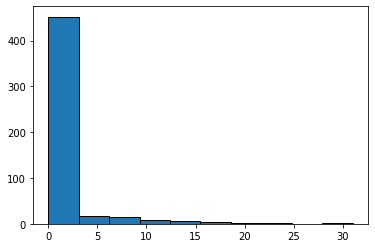

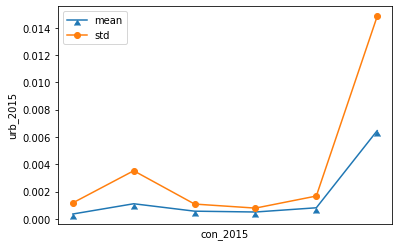

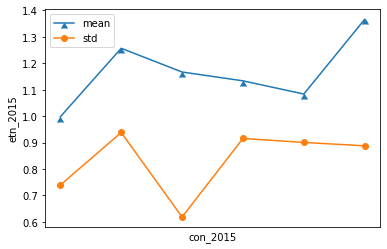

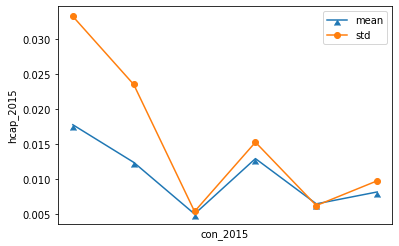

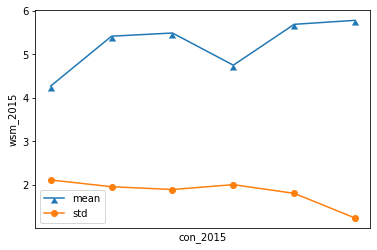

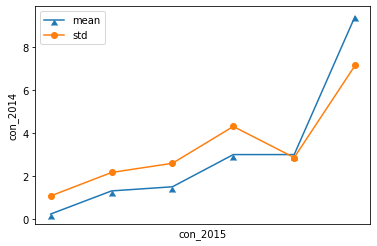

In [ ]:
bins = [0, 1, 2, 3, 5, 30]
plt.hist(y, edgecolor="black")
plt.show()

def plot_mean_std(x, y, feature_name):
  mean_std = []
  mean_std.append((x[y == bins[0]].mean(), x[y == bins[0]].std()))
  mean_std.append((x.loc[(y > bins[0]) & (y <= bins[1]), ].mean(), x.loc[(y > bins[0]) & (y <= bins[1]), ].std()))
  mean_std.append((x.loc[(y > bins[1]) & (y <= bins[2]), ].mean(), x.loc[(y > bins[1]) & (y <= bins[2]), ].std()))
  mean_std.append((x.loc[(y > bins[2]) & (y <= bins[3]), ].mean(), x.loc[(y > bins[2]) & (y <= bins[3]), ].std()))
  mean_std.append((x.loc[(y > bins[3]) & (y <= bins[4]), ].mean(), x.loc[(y > bins[3]) & (y <= bins[4]), ].std()))
  mean_std.append((x[y > bins[4]].mean(), x[y > bins[4]].std()))
  plt.plot([0, 1, 2, 3, 4, 5], [x[0] for x in mean_std], marker = 6)
  plt.plot([0, 1, 2, 3, 4, 5], [x[1] for x in mean_std], marker = 'o')
  
  plt.xticks([])
  plt.ylabel(feature_name)
  plt.xlabel("con_2015")
  plt.legend(['mean', 'std']) # loc="upper right"
  plt.show()

for col in gdf.columns[3:8]:
  #plt.yticks(np.arange(min(gdf[col]), max(gdf[col])+1, 1.5))
  plot_mean_std(gdf[col], y, col)
  

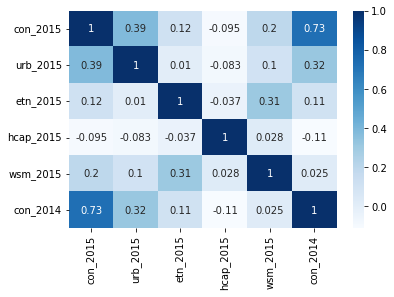

In [ ]:
import seaborn as sns

Var_Corr = gdf[[col for col in gdf.columns[2:8]]].corr() #inserito anche "con_2015"
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="Blues")

#alta correlazione positiva tra conflitti del 2015 e quelli del 2014

In [ ]:
def geoplot(feature_name, df, geojson):
  max_value = df[feature_name].max()
  fig = px.choropleth(df, geojson=geojson, locations='id',       
                      color=feature_name,
                      color_continuous_scale="Viridis",
                      scope="africa"
                      )
  fig.update_geos(fitbounds="locations", visible=False)
  fig.show()

name = "con_2015"
geoplot(name, df, j_file)

name = "con_2014"
geoplot(name, df, j_file)

name = "urb_2015"
geoplot(name, df, j_file)

name = "etn_2015"
geoplot(name, df, j_file)

name = "hcap_2015"
geoplot(name, df, j_file)

name = "wsm_2015"
geoplot(name, df, j_file)



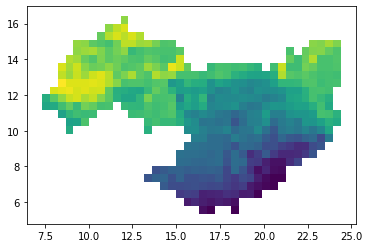

In [ ]:
gdf.plot(column = name)

In [ ]:
def geoplot2(feature_name, df, geojson):
  max_value = df[feature_name].max()
  fig = go.Figure(go.Choroplethmapbox(geojson=geojson, locations=df["id"], z=df[feature_name],
                                      colorscale="Viridis", zmin=0, zmax=max_value,
                                      marker_opacity=0.6, marker_line_width=0))
  fig.update_geos(fitbounds="locations", visible=False)
  fig.update_layout(mapbox_style="carto-positron",
                    mapbox_zoom=4.3, mapbox_center = {"lat": 11, "lon": 15.3})
  fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
  fig.show()
geoplot2("con_2015", df, j_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




Text(0.5, 1.0, 'Queen Neighbor Graph')

(6.726970516545356, 25.007686548377624, 5.026439225212898, 16.72843014844638)

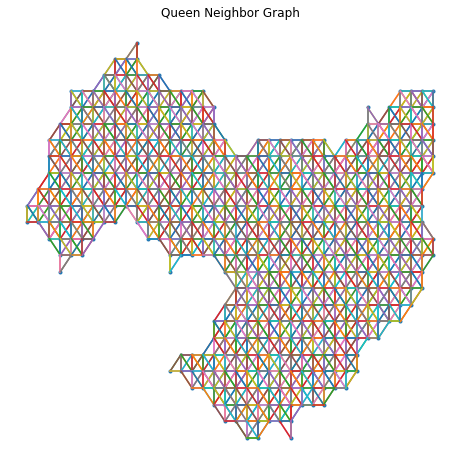

In [ ]:
centroids = gdf.geometry.centroid

fig = figure(figsize=(8,8))

plt.plot(centroids.x, centroids.y,'.')
for k,neighs in wq.neighbors.items():
  #print(k,neighs)
  origin = centroids[k]
  for neigh in neighs:
    segment = centroids[[k,neigh]]
    plt.plot(segment.x, segment.y, '-')
plt.title('Queen Neighbor Graph')
plt.axis('off')
plt.show()

In [ ]:
#indice di moran per "urb_2015"
y = gdf["urb_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.11109657243149565
0.002


In [ ]:
#indice di moran per "etn_2015"
y = gdf["etn_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.550017359828049
0.001


In [ ]:
#indice di moran per "hcap_2015"
y = gdf["hcap_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.5354727891963722
0.001


In [ ]:
#indice di moran per "wsm_2015"
y = gdf["wsm_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.9451069739747726
0.001


In [ ]:
#indice di moran per "con_2014"
y = gdf["con_2014"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.2655506903543081
0.001


In [ ]:
#indice di moran per "con_2015"
y = gdf["con_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.3482949892563304
0.001


(<Figure size 720x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9149b9f550>,
       dtype=object))

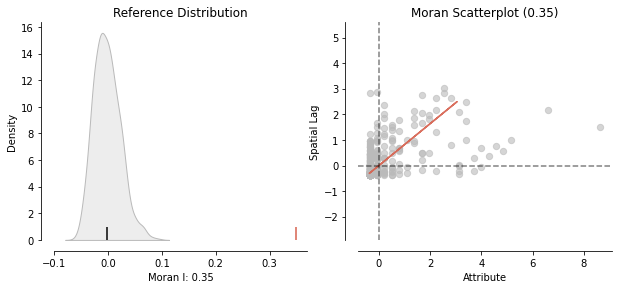

In [ ]:
from splot.esda import plot_moran

plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

In [ ]:
mi.p_sim

0.001

Text(0.5, 0, 'Conflicts')

Text(0, 0.5, 'Spatial Lag of Conflicts')

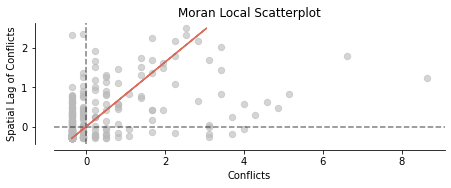

In [ ]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, wq)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Conflicts')
ax.set_ylabel('Spatial Lag of Conflicts')
plt.show()

Text(0.5, 0, 'Conflicts')

Text(0, 0.5, 'Spatial Lag of Conflicts')

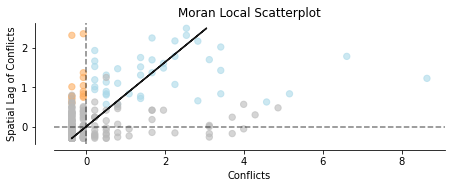

In [ ]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Conflicts')
ax.set_ylabel('Spatial Lag of Conflicts')
plt.show()

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9145c07c50>)

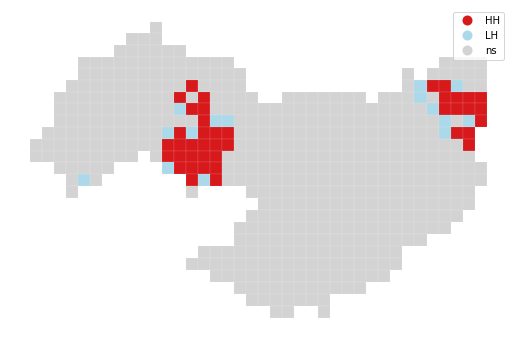

In [ ]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.show()

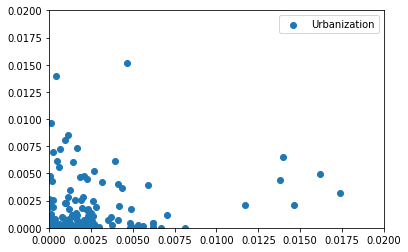

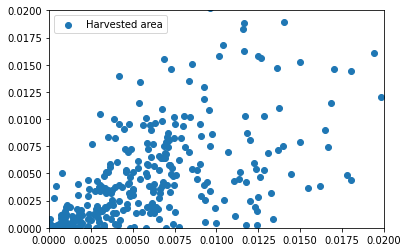

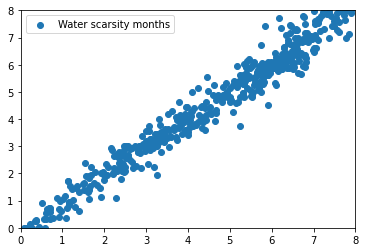

In [ ]:
def plot_lm(W, y, label, range):
  x = W.dot(y)
  xmin, xmax, ymin, ymax = range
  plt.scatter(x, y, label = label)
  plt.axis([xmin, xmax, ymin, ymax])
  plt.legend()
  plt.show()


plot_lm(W, gdf['urb_2015'], "Urbanization", (0, 0.02, 0, 0.02))
plot_lm(W, gdf['hcap_2015'], 'Harvested area', (0, 0.02, 0, 0.02))
plot_lm(W, gdf['wsm_2015'], 'Water scarsity months', (0, 8, 0, 8))

# STAN

# PSAR

In [ ]:
PSAR_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
}

parameters {
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    vector[N] epsilon;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}


transformed parameters {
    vector[N] mu;
    mu = exp(inverse(I-lambda*W)*(X*beta + W*X*gamma + epsilon));
    // mu = exp((I-lambda*W)\(X*beta + W*X*gamma + epsilon));   // more efficient than the previous one
}

model {   
    Y ~ poisson(mu);  
     
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
    
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | mu[j]);
  }
}
"""

stan_file = "./PSAR_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_model, file=f)

PSAR = CmdStanModel(stan_file=stan_file)

In [ ]:
PSAR_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y))
}

PSAR_fit = PSAR.sample(data=PSAR_data, chains=4, parallel_chains=4, 
                             iter_warmup=100, iter_sampling=500, verbose = True)

PSAR_cmdstanpy = az.from_cmdstanpy(PSAR_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR.pkl', 'wb') as f:
    pickle.dump(PSAR, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_fit, g)

# PSAR_QR

In [ ]:
PSAR_QR_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
}

parameters {
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    vector[N] epsilon;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}


transformed parameters {
    vector[N] mu;
    matrix[N,N] Q;
    matrix[N,N] R;
    Q = qr_thin_Q(I-lambda*W)
    R = qr_thin_R(I-lambda*W)
    mu = exp(inverse(R)*Q'*(X*beta + W*X*gamma + epsilon));
}

model {   
    Y ~ poisson(mu);  
     
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
    
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | mu[j]);
  }
}
"""

stan_file = "./PSAR_QR_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_QR_model, file=f)

PSAR_QR = CmdStanModel(stan_file=stan_file)

In [ ]:
PSAR_QR_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y))
}

PSAR_QR_fit = PSAR_QR.sample(data=PSAR_QR_data, chains=4, parallel_chains=4, 
                             iter_warmup=100, iter_sampling=500, verbose = True)

PSAR_QR_cmdstanpy = az.from_cmdstanpy(PSAR_QR_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_QR.pkl', 'wb') as f:
    pickle.dump(PSAR_QR, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_QR_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_QR_fit, g)

# PSAR_prec

In [ ]:
PSAR_prec_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}

transformed parameters{
  vector[N] zeros;
  zeros = rep_vector(0, N);
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
}

model {   
    Y ~ poisson_log(X * beta + W*X*gamma + phi);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    phi ~ multi_normal_prec(zeros, (I - lambda*W)'*(I - lambda*W)*tau_epsilon);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(row(X,j)*beta+row(W*X,j)*gamma+phi[j]));
  }
}
"""

stan_file = "./PSAR_prec_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_prec_model, file=f)

PSAR_prec = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_prec_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y))
}

PSAR_prec_fit = PSAR_prec.sample(data=PSAR_prec_data, chains=4, parallel_chains=4, 
                             iter_warmup=100, iter_sampling=500, show_progress = 1)

PSAR_prec_cmdstanpy = az.from_cmdstanpy(PSAR_prec_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_prec.pkl', 'wb') as f:
    pickle.dump(PSAR_prec, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_prec_fit, g)

# PSAR_sparse

In [ ]:
PSAR_model_sparse = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param W Adjacency matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix W, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - W*X*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}


transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
}


model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, W, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_sparse.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_sparse, file=f)

PSAR_sparse = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_sparse_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}

PSAR_sparse_fit = PSAR_very_sparse.sample(data=PSAR_very_sparse_data, chains=4, parallel_chains=4,
                                               iter_warmup=1000, iter_sampling=5000, show_progress = 1)

PSAR_sparse_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_sparse.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_sparse_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_fit, g)

# PSAR_very_sparse

In [ ]:
PSAR_model_very_sparse = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

}

model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_very_sparse.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_very_sparse, file=f)

PSAR_very_sparse = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_very_sparse_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}

PSAR_very_sparse_fit = PSAR_very_sparse.sample(data=PSAR_very_sparse_data, chains=4, parallel_chains=4,
                                               iter_warmup=1000, iter_sampling=5000, show_progress = 1)

PSAR_very_sparse_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_fit, g)

# PSAR_very_sparse_simple

In [ ]:
PSAR_model_very_sparse_simple = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

}

model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, 50);
    gamma ~ normal(0.0, 50);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_very_sparse_simple.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_very_sparse_simple, file=f)

PSAR_very_sparse_simple = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_very_sparse_simple_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}

PSAR_very_sparse_simple_fit = PSAR_very_sparse_simple.sample(data=PSAR_very_sparse_simple_data, chains=4, parallel_chains=4,
                             iter_warmup=1000, iter_sampling=5000, show_progress = 1)

PSAR_very_sparse_simple_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_simple_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_simple, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_simple_fit, g)

# PSAR_sparse_sym

In [ ]:
PSAR_model_sparse_sym = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param W Adjacency matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix W, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
      vector[N] ldet_terms1;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - W*X*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
      for (i in 1:N) ldet_terms1[i] = 1/D_sparse[i];
      
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) + sum(ldet_terms1) - 0.5*tau_epsilon*(temp)'*(temp);
     
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}


transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  vector[N] eigen;
  vector[N] invsqrtD;  
  for (i in 1:N) {invsqrtD[i] = 1 / sqrt(D_sparse[i]);}
    eigen = eigenvalues_sym(quad_form(diag_matrix(D_sparse)*W, diag_matrix(invsqrtD)));
}


model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, W, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_sparse_sym.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_sparse_sym, file=f)

PSAR_sparse_sym = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_sparse_sym_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
}

PSAR_sparse_sym_fit = PSAR_sparse_sym.sample(data=PSAR_sparse_sym_data, chains=1,
                             iter_warmup=100, iter_sampling=500, show_progress = 1)

PSAR_sparse_sym_cmdstanpy = az.from_cmdstanpy(PSAR_sparse_sym_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_sparse_sym.pkl', 'wb') as f:
    pickle.dump(PSAR_sparse_sym, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_sparse_sym_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_sparse_sym_fit, g)

# PSAR_very_sparse_sym

In [ ]:
PSAR_model_very_sparse_sym = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
      vector[N] ldet_terms1;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
      for (i in 1:N) ldet_terms1[i] = 1/D_sparse[i];
           
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) + sum(ldet_terms1) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  
  vector[N] eigen;
  vector[N] invsqrtD;  
  matrix[N,N] DW;
  for (i in 1:N) {invsqrtD[i] = 1 / sqrt(D_sparse[i]);}
  DW = rep_matrix(0,N,N);
  for (i in 1:W_n) {
    DW[W_sparse[i,1],W_sparse[i,2]]=1;
    DW[W_sparse[i,2],W_sparse[i,1]]=1;
  }
  eigen = eigenvalues_sym(quad_form(DW, diag_matrix(invsqrtD)));
  
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

}

model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

In [ ]:
PSAR_very_sparse_sym_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
}

PSAR_very_sparse_sym_fit = PSAR_very_sparse_sym.sample(data=PSAR_very_sparse_sym_data, chains=1, 
                             iter_warmup=100, iter_sampling=500, show_progress = 1)

PSAR_very_sparse_sym_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_sym_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_sym.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_sym, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_sym_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_sym_fit, g)

# PSAR_very_sparse_variances

In [ ]:
PSAR_model_very_sparse_variances = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    vector<lower=0>[p] sigma_beta;
    vector<lower=0>[p] sigma_gamma;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

}

model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_very_sparse_variances.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_very_sparse_variances, file=f)

PSAR_very_sparse_variances = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_very_sparse_variances_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}

PSAR_very_sparse_variances_fit = PSAR_very_sparse_variances.sample(data=PSAR_very_sparse_variances_data, chains=4, parallel_chains=4,
                             iter_warmup=1000, iter_sampling=5000, show_progress = 1)

PSAR_very_sparse_variances_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_variances_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_variances.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_variances, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_variances_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_variances_fit, g)

# PSAR_very_sparse_simple_baseline1

In [ ]:
PSAR_very_sparse_simple_baseline1_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 

    int<lower=0> Y[N];
    matrix[N,p] X;
}

parameters {
    vector[p] beta; 
    vector[N] epsilon;
    real<lower=0> sigma_epsilon;
}


model {   
    Y ~ poisson_log(X*beta + epsilon);  
     
    beta ~ normal(0.0, 50);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_epsilon ~ uniform(0.0, 100.0);
    
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | mu[j]);
  }
}
"""

stan_file = "./PSAR__very_sparse_simple_baseline1_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_very_sparse_simple_baseline1_model, file=f)

PSAR_very_sparse_simple_baseline1 = CmdStanModel(stan_file=stan_file)

In [ ]:
PSAR_very_sparse_simple_baseline1_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
}

PSAR_very_sparse_simple_baseline1_fit = PSAR_very_sparse_simple_baseline1.sample(data=PSAR_very_sparse_simple_baseline1_data, chains=4, parallel_chains=4,
                             iter_warmup=1000, iter_sampling=5000, show_progress = 1)

PSAR_very_sparse_simple_baseline1_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_simple_baseline1_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline1.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_simple_baseline1, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline1_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_simple_baseline1_fit, g)

# PSAR_very_sparse_simple_baseline2

In [ ]:
PSAR_very_sparse_simple_baseline2_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
}

parameters {
    vector[p] beta; 
    vector[p] gamma;         
    vector[N] epsilon;
    real<lower=0> sigma_epsilon;
}


model {   
    Y ~ poisson_log(X*beta + W*X*gamma + epsilon);  
     
    beta ~ normal(0.0, 50);
    gamma ~ normal(0.0, 50);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_epsilon ~ uniform(0.0, 100.0);
    
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | mu[j]);
  }
}
"""

stan_file = "./PSAR_very_sparse_simple_baseline2_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_very_sparse_simple_baseline2_model, file=f)

PSAR_very_sparse_simple_baseline2 = CmdStanModel(stan_file=stan_file)

In [ ]:
PSAR_very_sparse_simple_baseline2_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W": W,
}

PSAR_very_sparse_simple_baseline2_fit = PSAR_very_sparse_simple_baseline2.sample(data=PSAR_very_sparse_simple_baseline2_data, chains=4, parallel_chains=4,
                             iter_warmup=1000, iter_sampling=5000, show_progress = 1)

PSAR_very_sparse_simple_baseline2_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_simple_baseline2_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline2.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_simple_baseline2, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline2_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_simple_baseline2_fit, g)

# PostProcessing

In [ ]:
# load a pre-compiled model

model_fit = pickle.load(open('mnt/MyDrive/Project_X Bayesian/PSAR_sparse_fit.pkl', 'rb'))
model = az.from_cmdstanpy(PSAR_sparse_fit)

In [ ]:
az.plot_trace(model.posterior.beta, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.gamma, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior['lambda'], compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.sigma_beta, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.sigma_gamma, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.sigma_epsilon, compact=False)
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(model.posterior.beta[1, :25, 0], model.posterior.beta[1, :25, 1])   #first is the chain, second the iterations and third the betas
plt.show()

In [ ]:
import seaborn as sns
fig = plt.figure()
for i in range(5):
    sns.kdeplot(model.posterior.beta[:, :, i].values.reshape(-1, ), label = "beta" + str(i+1))
plt.legend()
plt.show()

fig = plt.figure()
for i in range(5):
    sns.kdeplot(model.posterior.gamma[:, :, i].values.reshape(-1, ), label = "gamma" + str(i+1))
plt.legend()
plt.show()

fig = plt.figure()
sns.kdeplot(model.posterior["lambda"][:, :, i].values.reshape(-1, ), label = "gamma" + str(i+1))
plt.legend()
plt.show()

fig = plt.figure()
sns.kdeplot(model.posterior.sigma_beta[:, :].values.reshape(-1, ), label = "sigma_beta")
sns.kdeplot(model.posterior.sigma_gamma[:, :].values.reshape(-1, ), label = "sigma_gamma")
sns.kdeplot(model.posterior.sigma_epsilon[:, :].values.reshape(-1, ), label = "sigma_epsilon")
plt.legend()
plt.show()

In [ ]:
np.sum(model.sample_stats.diverging)

In [ ]:
# beta
az.stats.diagnostics.ess(model, method="bulk").beta
az.stats.diagnostics.ess(model, method="tail").beta
az.stats.diagnostics.rhat(model).beta
az.rhat(model).beta

# gamma
az.stats.diagnostics.ess(model, method="bulk").gamma
az.stats.diagnostics.ess(model, method="tail").gamma
az.stats.diagnostics.rhat(model).gamma
az.rhat(model).gamma

#lambda
az.stats.diagnostics.ess(model, method="bulk")['lambda']
az.stats.diagnostics.ess(model, method="tail")['lambda']
az.stats.diagnostics.rhat(model)['lambda']
az.rhat(model)['lambda']

# sigma_beta
az.stats.diagnostics.ess(model, method="bulk").sigma_beta
az.stats.diagnostics.ess(model, method="tail").sigma_beta
az.stats.diagnostics.rhat(model).sigma_beta
az.rhat(model).sigma_beta

# sigma_gamma
az.stats.diagnostics.ess(model, method="bulk").sigma_gamma
az.stats.diagnostics.ess(model, method="tail").sigma_gamma
az.stats.diagnostics.rhat(model).sigma_gamma
az.rhat(model).sigma_gamma

# sigma_epsilon
az.stats.diagnostics.ess(model, method="bulk").sigma_epsilon
az.stats.diagnostics.ess(model, method="tail").sigma_epsilon
az.stats.diagnostics.rhat(model).sigma_epsilon
az.rhat(model).sigma_epsilon

In [ ]:
print(az.hdi(model, 0.95, var_names=["beta"])) #CI0.95(beta)
print(az.hdi(model, 0.95, var_names=["gamma"]))
print(az.hdi(model, 0.95, var_names=["lambda"]))
print(az.hdi(model, 0.95, var_names=["sigma_beta"]))
print(az.hdi(model, 0.95, var_names=["sigma_gamma"]))
print(az.hdi(model, 0.95, var_names=["sigma_epsilon"]))

In [ ]:
# lower is a vector of the lower points of CI

# upper is a vector of the lower points of CI

# labels is a vector with the name on the y axis

def plot_interval(lower, upper, labels, colour = "red"):
  data_dict = {}
  data_dict['category'] = labels
  data_dict['lower'] = lower
  data_dict['upper'] = upper
  dataset = pd.DataFrame(data_dict)

  for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color=colour)
  plt.yticks(range(len(dataset)), list(dataset['category']))

plot_interval()

In [ ]:
import arviz as az

chains_az = az.convert_to_inference_data(
    {"beta": model.posterior.beta[:, :, :], "gamma": model.posterior.gamma[:, :, :],
     "sigma_beta": model.posterior.sigma_beta[:, :], "sigma_gamma": model.posterior.sigma_gamma[:, :], "sigma_lambda": model.posterior.sigma_epsilon[:, :]})

print(az.ess(chains_az))

az.plot_autocorr(chains_az)
plt.show()

In [ ]:
print("WAIC: ", az.waic(PSAR_sparse_cmdstanpy, var_name="log_lik"))

In [ ]:
print("LOO: ", az.loo(PSAR_sparse_cmdstanpy, var_name="log_lik"))

# Models comparison

In [ ]:
az.compare({"Model1": model , "Model2": model})